# Plotting Antarctica

This notebook shows how to plot data for Antarctica.

To plot Antarctica, you must adjust `xlim`, `ylim` and `projection`. In these examples, we use `projection=ccrs.SouthPolarStereo()` for a polar projection as used by the Bureau of Meteorology for Southern Hemisphere maps. To plot the outline of the Antarctic continent, set `coastlines = True`.

In [1]:
cd /g/data/mn51/users/gt3409/plotting_maps/

/g/data/mn51/users/gt3409/plotting_maps


In [2]:
%%time
from acs_plotting_maps import *
import xarray as xr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from matplotlib import colors, cm

regions = regions_dict['ncra_regions']

CPU times: user 13.7 s, sys: 960 ms, total: 14.7 s
Wall time: 15.3 s


In [3]:
%%time
var="dhw_max"

ds_gwl15 = xr.open_dataset("/g/data/ia39/ncra/ocean/GW1p5_dhw.nc")\
.rename({"xt_ocean":"lon", "yt_ocean":"lat"})
ds_gwl20 = xr.open_dataset("/g/data/ia39/ncra/ocean/GW2p0_dhw.nc")\
.rename({"xt_ocean":"lon", "yt_ocean":"lat"})
ds_gwl30 = xr.open_dataset("/g/data/ia39/ncra/ocean/GW3p0_dhw.nc")\
.rename({"xt_ocean":"lon", "yt_ocean":"lat"})


CPU times: user 3.4 s, sys: 939 ms, total: 4.34 s
Wall time: 6.11 s


CPU times: user 43.4 s, sys: 2.89 s, total: 46.2 s
Wall time: 46.2 s


(<Figure size 1000x400 with 5 Axes>,
 array([<GeoAxes: >, <GeoAxes: >, <GeoAxes: >], dtype=object))

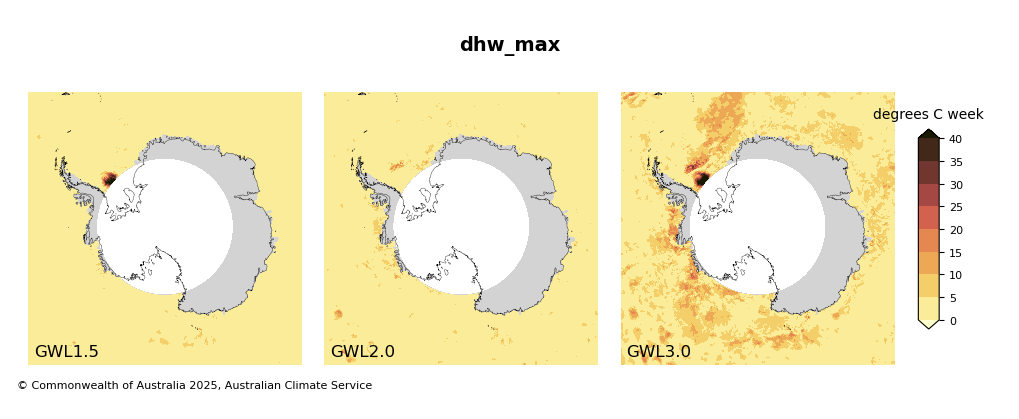

In [4]:
%%time
plot_acs_hazard_3pp(ds_gwl15=ds_gwl15[var],
                    ds_gwl20=ds_gwl20[var],
                    ds_gwl30=ds_gwl30[var],
                    regions = regions,
                    title = var,
                    cmap = cmap_dict["ipcc_temp_seq"],
                    ticks = np.arange(0, 41, 5),
                    cbar_label = "degrees C week",
                    cbar_extend="both",
                    watermark="",
                   mask_not_australia=False,
                   issued_date="",
                    orientation="horizontal",
                    tick_rotation=0,
                    coastlines=True,
                    xlim=(-180, 180),
                    ylim=(-90, -60),
                    projection=ccrs.SouthPolarStereo(),
                    )


In [5]:
%%time

var="temp"

ds_gwl12 = xr.open_dataset("/g/data/ia39/ncra/ocean/sst_climatology_GW1p2.nc")\
.rename({"xt_ocean":"lon", "yt_ocean":"lat"}).sel(st_ocean=2.5).mean("month")

ds_gwl15 = xr.open_dataset("/g/data/ia39/ncra/ocean/sst_climatology_GW1p5.nc")\
.rename({"xt_ocean":"lon", "yt_ocean":"lat"}).sel(st_ocean=2.5).mean("month")
ds_gwl20 = xr.open_dataset("/g/data/ia39/ncra/ocean/sst_climatology_GW2p0.nc")\
.rename({"xt_ocean":"lon", "yt_ocean":"lat"}).sel(st_ocean=2.5).mean("month")
ds_gwl30 = xr.open_dataset("/g/data/ia39/ncra/ocean/sst_climatology_GW3p0.nc")\
.rename({"xt_ocean":"lon", "yt_ocean":"lat"}).sel(st_ocean=2.5).mean("month")


CPU times: user 1.03 s, sys: 815 ms, total: 1.84 s
Wall time: 1.9 s


CPU times: user 35.7 s, sys: 4.21 s, total: 39.9 s
Wall time: 39.9 s


(<Figure size 1000x300 with 5 Axes>,
 array([<GeoAxes: >, <GeoAxes: >, <GeoAxes: >, <GeoAxes: >], dtype=object))

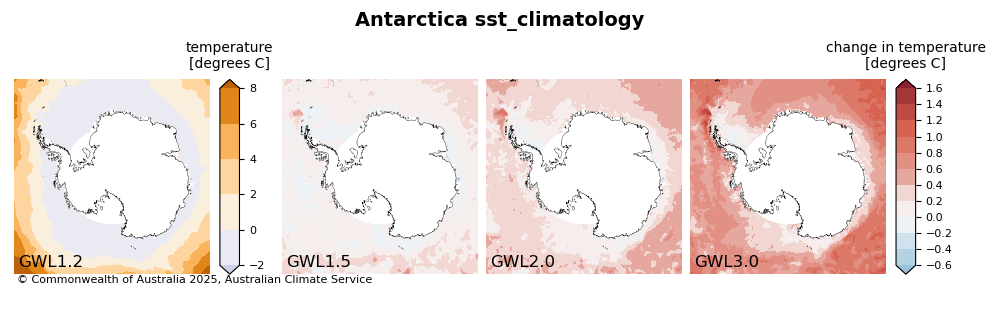

In [6]:
%%time
plot_acs_hazard_1plus3(ds_gwl12=ds_gwl12[var],
                       gwl12_cbar_label="temperature\n[degrees C]",
                       gwl12_cmap=cmap_dict["acs_temperature_div2"],
                       gwl12_ticks=np.arange(-2, 10, 2),
                       gwl12_vcentre=0,
                       gwl12_cbar_extend="both",
                       ds_gwl15=ds_gwl15[var] -ds_gwl12[var],
                       ds_gwl20=ds_gwl20[var] -ds_gwl12[var],
                       ds_gwl30=ds_gwl30[var] -ds_gwl12[var],
                       regions = regions,
                       title = "Antarctica sst_climatology",
                       cmap = cmap_dict["ipcc_temp_div"],
                       ticks = np.arange(-0.6, 1.7, 0.2),
                       vcentre=0,
                       cbar_label = "change in temperature\n[degrees C]",
                       cbar_extend="both",
                       watermark="",
                       mask_not_australia=False,
                       issued_date="",
                       orientation="horizontal",
                       tick_rotation=0,
                       coastlines=True,
                       xlim=(-180, 180),
                       ylim=(-90, -60),
                       projection=ccrs.SouthPolarStereo(),
                       )


(<Figure size 600x530 with 3 Axes>, <GeoAxes: >)

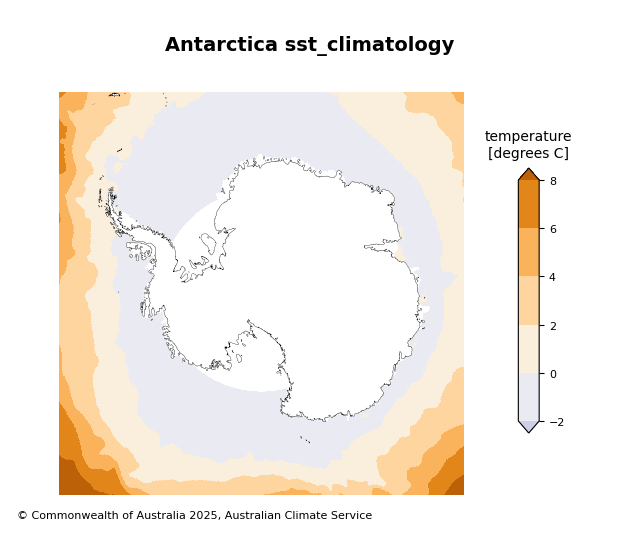

In [7]:
plot_acs_hazard_1pp(data=ds_gwl12[var],
                    cbar_label="temperature\n[degrees C]",
                    cmap=cmap_dict["acs_temperature_div2"],
                    ticks=np.arange(-2, 10, 2),
                    vcentre=0,
                    cbar_extend="both",
                    regions = regions,
                    title = "Antarctica sst_climatology",
                    watermark="",
                    mask_not_australia=False,
                    issued_date="",
                    coastlines=True,
                    xlim=(-180, 180),
                    ylim=(-90, -60),
                    projection=ccrs.SouthPolarStereo(),
                    )

CPU times: user 54.1 s, sys: 3.83 s, total: 57.9 s
Wall time: 57.9 s


(<Figure size 1000x300 with 5 Axes>,
 array([<GeoAxes: >, <GeoAxes: >, <GeoAxes: >, <GeoAxes: >], dtype=object))

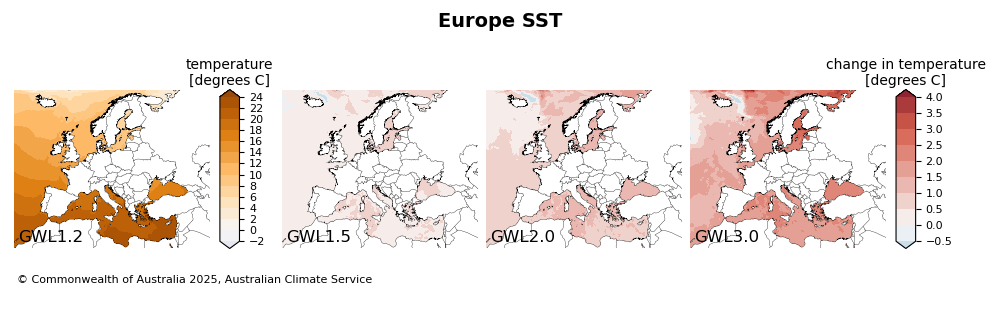

In [8]:
%%time
# Plot Europe
plot_acs_hazard_1plus3(ds_gwl12=ds_gwl12[var],
                       gwl12_cbar_label="temperature\n[degrees C]",
                       gwl12_cmap=cmap_dict["acs_temperature_div2"],
                       gwl12_ticks=np.arange(-2, 25, 2),
                       gwl12_vcentre=0,
                       gwl12_cbar_extend="both",
                       ds_gwl15=ds_gwl15[var] -ds_gwl12[var],
                       ds_gwl20=ds_gwl20[var] -ds_gwl12[var],
                       ds_gwl30=ds_gwl30[var] -ds_gwl12[var],
                       regions = regions,
                       title = "Europe SST",
                       cmap = cmap_dict["ipcc_temp_div"],
                       ticks = np.arange(-0.5, 4.1, 0.5),
                       vcentre=0,
                       cbar_label = "change in temperature\n[degrees C]",
                       cbar_extend="both",
                       watermark="",
                       mask_not_australia=False,
                       mask_australia=False,
                       issued_date="",
                       orientation="horizontal",
                       tick_rotation=0,
                       coastlines=True,
                       xlim=(-15, 45),
                       ylim=(30, 70),
                       projection=ccrs.AlbersEqualArea(15, 50),
                       )


CPU times: user 8.87 s, sys: 793 ms, total: 9.66 s
Wall time: 9.66 s


(<Figure size 600x530 with 3 Axes>, <GeoAxes: >)

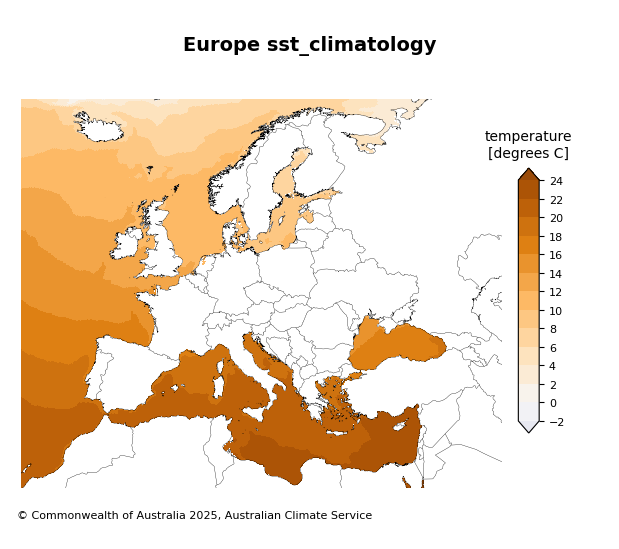

In [9]:
%%time
# Plot Europe
plot_acs_hazard_1pp(data=ds_gwl12[var],
                       cbar_label="temperature\n[degrees C]",
                       cmap=cmap_dict["acs_temperature_div2"],
                       ticks=np.arange(-2, 25, 2),
                       vcentre=0,
                       cbar_extend="both",
                       regions = regions,
                       title = "Europe sst_climatology",
                       watermark="",
                       mask_not_australia=False,
                       mask_australia=False,
                       issued_date="",
                       tick_rotation=0,
                       coastlines=True,
                       xlim=(-15, 45),
                       ylim=(30, 70),
                       projection=ccrs.AlbersEqualArea(15, 50),
                       )
